In [2]:
import pandas as pd

In [13]:
df = pd.read_csv('../../data/2013-2020_US/labeled.csv', header=0)

In [14]:
df = df[['Input.index', 'Input.title', 'Input.article', 'Answer.semantic-similarity.label']]

In [15]:
df = df.rename(columns={'Input.index': 'index', 'Input.title': 'title', 'Input.article': 'article', 'Answer.semantic-similarity.label': 'label'})

In [16]:
df = df.dropna()

In [17]:
df['label'] = df['label'].str.slice(0,1)

In [18]:
df['label'] = df['label'].astype(float)

In [20]:
df = df.sort_values(by=['index'])

In [21]:
df

,index,title,article,label
1986,1305,"Nikki Bella Now Believes John Cena Wants Kids,...",John Cena's very public campaign to win back N...,4.0
1987,1305,"Nikki Bella Now Believes John Cena Wants Kids,...",John Cena's very public campaign to win back N...,5.0
1969,6528,Rouhani says Iran will keep producing missiles...,DUBAI (Reuters) - Iran will continue to produc...,2.0
1968,6528,Rouhani says Iran will keep producing missiles...,DUBAI (Reuters) - Iran will continue to produc...,4.0
1982,13823,Jerry Jones: Ezekiel Elliott Won't Be Suspended,Jerry Jones tells TMZ Sports he does not belie...,4.0
...,...,...,...,...
712,2683873,$4.3 Million Homes in California,What you Get A French Caribbean-inspired home ...,4.0
295,2684134,"Ventilators and Coronavirus: Amid Desperation,...",President Trump wants the private sector to fi...,3.0
294,2684134,"Ventilators and Coronavirus: Amid Desperation,...",President Trump wants the private sector to fi...,2.0
1101,2688615,How to choose a free videoconference app,Most people are currently relying on videoconf...,5.0


In [22]:
df = df.groupby(df['index']).aggregate({'title': 'first', 'article': 'first', 'label': 'var'})

In [23]:
#df.to_csv('../../data/2013-2020_US/labeled-cleaned.csv')

In [24]:
df

,title,article,label
index,,,
1305,"Nikki Bella Now Believes John Cena Wants Kids,...",John Cena's very public campaign to win back N...,0.5
6528,Rouhani says Iran will keep producing missiles...,DUBAI (Reuters) - Iran will continue to produc...,2.0
13823,Jerry Jones: Ezekiel Elliott Won't Be Suspended,Jerry Jones tells TMZ Sports he does not belie...,0.5
29908,Sen. Marco Rubio just threatened to “take care...,The decorum of the United States Senate was on...,0.5
31325,Darius McCrary Says Estranged Wife's Out for F...,"Former ""Family Matters"" star Darius McCrary to...",2.0
...,...,...,...
2678751,Stimulus bill: When will you see money and ben...,(CNN)Congress and President Donald Trump have...,0.5
2679327,California coronavirus: Doctors 'cautiously ho...,(CNN)Two weeks after San Francisco issued the...,0.0
2683873,$4.3 Million Homes in California,What you Get A French Caribbean-inspired home ...,0.0


<AxesSubplot:>

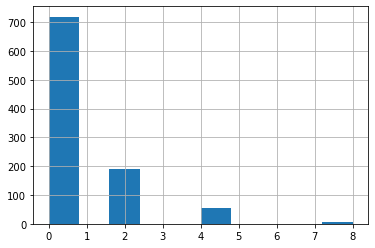

In [25]:
df.label.hist()